In [99]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("../data/sentiment_data.csv")

df.head()

,Unnamed: 0,review,result
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


In [ ]:
print("Shape:", df.shape)
print(df.columns)

df = df.drop(columns=[df.columns[0]])

# Keeping only review and result
df = df[['review', 'result']]

df.head()

Shape: (241145, 3)
Index(['Unnamed: 0', 'review', 'result'], dtype='object')


,review,result
0,lets forget apple pay required brand new iphon...,1
1,nz retailers don’t even contactless credit car...,0
2,forever acknowledge channel help lessons ideas...,2
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,2


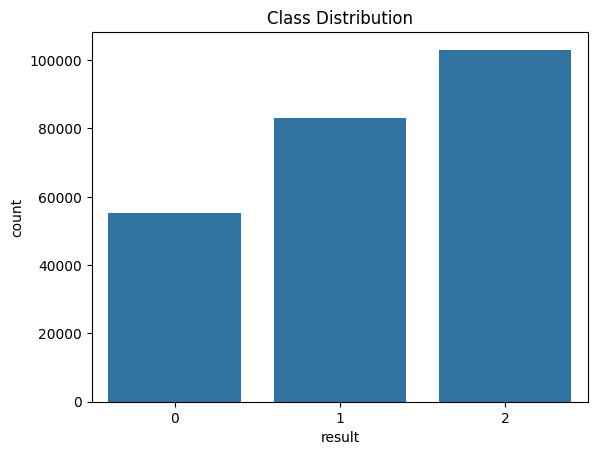

In [102]:
sns.countplot(x='result', data=df)
plt.title("Class Distribution")
plt.show()

In [103]:
y = to_categorical(df['result'])
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], shape=(241145, 3))

**Text Tokenization**

In [104]:
MAX_WORDS = 10000
MAX_LEN = 100
df['review'] = df['review'].fillna("").astype(str)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=MAX_LEN)
X

array([[   0,    0,    0, ...,  106,  792, 1192],
       [   0,    0,    0, ...,  261, 5369,   66],
       [   0,    0,    0, ..., 5721,  335,  548],
       ...,
       [   0,    0,    0, ..., 3058, 6353,  254],
       [   0,    0,    0, ...,  496,  318,  615],
       [   0,    0,    0, ...,   58,  461,  147]],
      shape=(241145, 100), dtype=int32)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (192916, 100)
Testing shape: (48229, 100)


*Building ANN Model*

In [ ]:
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=MAX_WORDS, output_dim=64, input_length=MAX_LEN))

# Reducing tensor size
model.add(GlobalAveragePooling1D())

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (3 classes)
model.add(Dense(3, activation='softmax'))

d:\Works\ML\ml-env\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [107]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [108]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.6123 - loss: 0.8517 - val_accuracy: 0.7458 - val_loss: 0.6466
Epoch 2/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.7670 - loss: 0.6210 - val_accuracy: 0.7595 - val_loss: 0.6279
Epoch 3/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 122s 14ms/step - accuracy: 0.7905 - loss: 0.5672 - val_accuracy: 0.5481 - val_loss: 0.7937
Epoch 4/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8043 - loss: 0.5342 - val_accuracy: 0.8075 - val_loss: 0.5209
Epoch 5/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8122 - loss: 0.5136 - val_accuracy: 0.8162 - val_loss: 0.4994
Epoch 6/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 70s 12ms/step - accuracy: 0.8153 - loss: 0.5047 - val_accuracy: 0.7876 - val_loss: 0.6120
Epoch 7/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 74s 12ms/step - accuracy: 0.8186 - loss: 0.4957 - val_accuracy: 0.8105 - val_loss: 0.5299
Epoch 8/10
6029/6029 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8240 - lo

In [109]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,933,067 (7.37 MB)

 Trainable params: 644,355 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,288,712 (4.92 MB)

***Plot Accuracy & Loss***

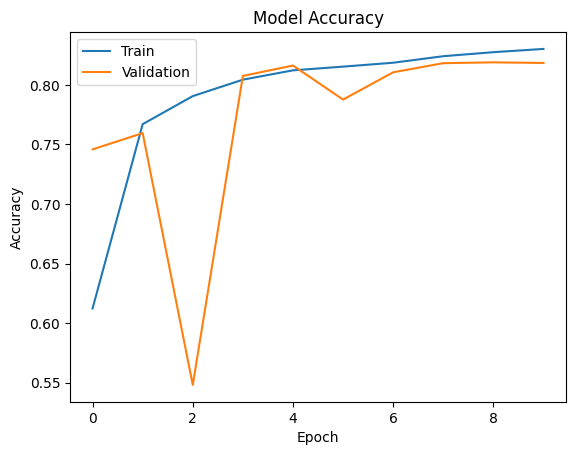

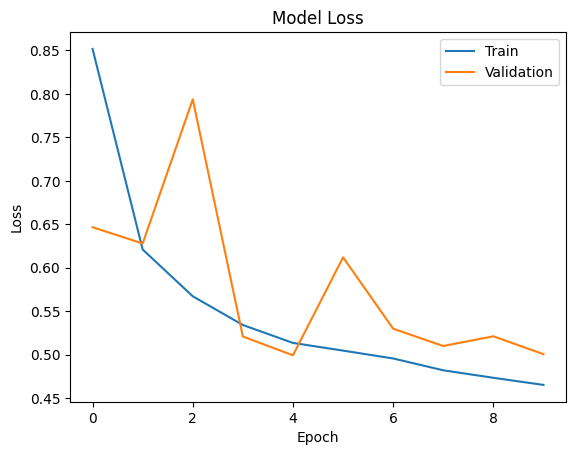

In [110]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [111]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8184 - loss: 0.5007
Test Accuracy: 0.818366527557373


***Confusion Matrix***

1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step


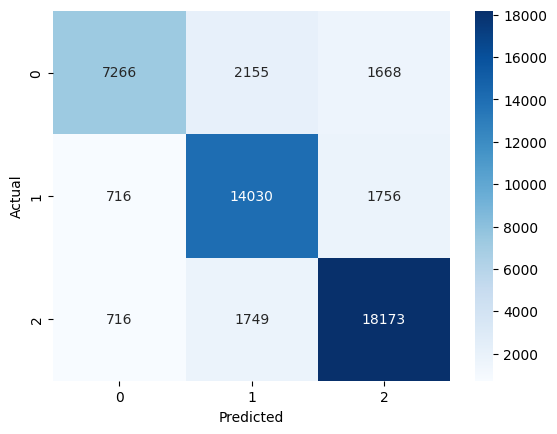

              precision    recall  f1-score   support

           0       0.84      0.66      0.73     11089
           1       0.78      0.85      0.81     16502
           2       0.84      0.88      0.86     20638

    accuracy                           0.82     48229
   macro avg       0.82      0.80      0.80     48229
weighted avg       0.82      0.82      0.82     48229



In [112]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred_classes))

**Testing Custom Review**

In [ ]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    prediction = model.predict(padded)

    classes = ["negative", "neutral", "positive"]
    pred_label = classes[np.argmax(prediction)]
    return pred_label

# Try
print(predict_sentiment("This movie was absolutely fantastic!"))
print(predict_sentiment("Worst experience ever."))
print(predict_sentiment("Nothing special, just a random movie."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
neutral
